Best Response Sequences in the Iterated Prisoner's Dilemma
------------

This Chapter explores best response strategies, to a collection of opponents, in the form of sequences. The APL project is used to simulate matches between these opponents and the "sequence" players. Morespecifically, the class `Cycler` is used to simulate the sequences.

In [1]:
import axelrod as axl

**Example of $S = \{D, D, D, C, C, C, D, D, C, C\}$ against Cooperator**

In [2]:
players = [axl.Cycler('DDDCCCDDCC'), axl.Cooperator()]

In [3]:
match = axl.Match(players, turns=10)
match.play()

[(D, C),
 (D, C),
 (D, C),
 (C, C),
 (C, C),
 (C, C),
 (D, C),
 (D, C),
 (C, C),
 (C, C)]

In [4]:
match.final_score_per_turn()

(4.0, 1.5)

**Example of $S = \{D, D, D, C, C, C, D, D, C, C\}$ against Tit For Tat**

In [5]:
players = [axl.Cycler('DDDCCCDDCC'), axl.TitForTat()]

In [6]:
match = axl.Match(players, turns=10)
match.play()

[(D, C),
 (D, D),
 (D, D),
 (C, D),
 (C, C),
 (C, C),
 (D, C),
 (D, D),
 (C, D),
 (C, C)]

In [7]:
match.final_score_per_turn()

(2.2, 2.2)

**Example against Random**

In [8]:
players = [axl.Random(), axl.Cycler('DDDCCCDDCC')]

In [9]:
axl.seed(1)
match = axl.Match(players, turns=10)
actions = match.play()

In [10]:
actions

[(C, D),
 (D, D),
 (C, D),
 (C, C),
 (C, C),
 (C, C),
 (C, D),
 (C, D),
 (C, C),
 (D, C)]

In [11]:
match.final_score_per_turn()

(1.8, 3.3)

In [12]:
axl.seed(2)
match = axl.Match(players, turns=10)
actions = match.play()

In [13]:
match.final_score_per_turn()

(1.7, 3.2)

This work uses random seeds to capture different behaviours of stochastic strategies. Random seeding also makes it possible to reproduce the behaviour of stochastic strategies.

In [14]:
players = [axl.Cycler('DDDCCCDDCC'), axl.Random()]
for seed in range(5):
    axl.seed(seed)
    match = axl.Match(players, turns=10)
    actions = match.play()
    print(actions, match.final_score_per_turn())
    print("================================================================================")


[(D, D), (D, D), (D, D), (C, D), (C, C), (C, D), (D, C), (D, D), (C, D), (C, C)] (1.5, 2.5)
[(D, C), (D, D), (D, C), (C, C), (C, C), (C, C), (D, C), (D, C), (C, C), (C, D)] (3.3, 1.8)
[(D, C), (D, C), (D, D), (C, C), (C, C), (C, C), (D, C), (D, D), (C, C), (C, C)] (3.2, 1.7)
[(D, D), (D, D), (D, C), (C, D), (C, D), (C, D), (D, C), (D, C), (C, C), (C, C)] (2.3, 2.3)
[(D, D), (D, D), (D, D), (C, D), (C, D), (C, C), (D, D), (D, C), (C, C), (C, C)] (1.8, 2.3)


`sequence_sensei` is a package which has been developed to perform a genetic algorithm on sequences.

In [15]:
import sequence_sensei as ss
import numpy as np

Generating the starting population is done using the following code:

In [16]:
initial_population = ss.get_initial_population(half_size_of_population=5, sequence_length=8)

In [17]:
np.matrix(initial_population)

matrix([[1, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 0]])

In [18]:
np.matrix([[axl.Action(gene) for gene in member] for member in initial_population])

matrix([[C, D, D, D, D, D, D, D],
        [D, C, C, C, C, C, C, C],
        [C, C, D, D, D, D, D, D],
        [D, D, C, C, C, C, C, C],
        [C, C, C, C, D, D, D, D],
        [D, D, D, D, C, C, C, C],
        [C, C, C, C, C, C, D, D],
        [D, D, D, D, D, D, C, C],
        [C, C, C, C, C, C, C, C],
        [D, D, D, D, D, D, D, D]], dtype=object)

`sequence_sensei` includes functions for the crossover and mutation properties of a genetic algorithm.

In [19]:
import random
import sequence_sensei as ss

In [20]:
turns = 10

cooperator = [1 for _ in range(turns)]
alternator = [i % 2 for i in range(turns)]

In [21]:
random.seed(0)
new_member = ss.crossover(cooperator, alternator)

In [22]:
new_member

[1, 1, 1, 1, 1, 1, 0, 1, 0, 1]

In [23]:
random.seed(1)
[ss.mutation(gene, mutation_probability=0.05) for gene in new_member] 

[1, 1, 1, 1, 1, 1, 0, 1, 0, 0]

In [24]:
random.seed(1)
[round(random.random(), 3) for gene in new_member]

[0.134, 0.847, 0.764, 0.255, 0.495, 0.449, 0.652, 0.789, 0.094, 0.028]

**Genetic Algorithm Analysis**

In [353]:
import json

from pathlib import Path

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

In [ ]:
font = {"size": 11,"weight": "bold"}
mpl.rc("font", **font)

**Tables**

The raw data need to be download to carry out the following analysis. We will read in a few exported summaries and export latex table to demostrate the format of the exported summaries. 

In [1]:
columns = ['opponent', 'seed', 'bottleneck', 'mutation probability',
           'half size population', 'generation', 'index', 'score',
           'gene_0', 'gene_1', 'gene_202', 'gene_203', 'gene_204']

labels = {'bottleneck': '$b$', 'mutation probability': '$p_m$',
          'half size population': '$K/2$', 'generation': '$G_i$'}

An example of a stochastic player.

In [ ]:
champion = pd.read_csv('/Volumes/ext/Data/raw_data/Champion_9/main.csv')

In [53]:
with open("tex/champion_seed_nine_table.tex", "w") as file:
    table = champion.iloc[np.r_[0:5, -5:0]][columns]
    table = table.rename(columns=labels)
    file.write(table.to_latex().replace('\_', ' '))   

An example of a deterministic players.

In [34]:
alternator = pd.read_csv('/Volumes/ext/Data/raw_data/Alternator_nan/main.csv')

In [54]:
with open("tex/alternator_table.tex", "w") as file:
    table = alternator.iloc[np.r_[0:5, -5:0]][columns]
    table = table.rename(columns=labels)
    file.write(table.to_latex().replace('\_', ' ')) 

In [56]:
champion_four = pd.read_csv('/Volumes/ext/Data/raw_data/Champion_4/main.csv')

**Accuracy**

The accuracy of the stochastic players sequences.

In [158]:
with open('checks.txt') as json_file:
    data = json.load(json_file)

In [159]:
len(data)

2309

In [160]:
sum(data.values()) / len(data)

0.6634906886097878

**Genetic algorithm converging examples**

Tit for Tat. A deterministic strategy that we know the best response to.

In [58]:
tft = pd.read_csv('/Volumes/ext/Data/raw_data/Tit For Tat_nan/main.csv')

In [292]:
last_generation_tft = tft[tft['generation'] == 2000]

In [293]:
last_generation_tft.head()

,opponent,seed,num. of generations,bottleneck,mutation probability,half size population,generation,index,score,gene_0,...,gene_195,gene_196,gene_197,gene_198,gene_199,gene_200,gene_201,gene_202,gene_203,gene_204
40000,Tit For Tat,NaN,2000,10,0.01,10,2000,0,3.009756,1,...,1,1,1,1,1,1,1,1,1,0
40001,Tit For Tat,NaN,2000,10,0.01,10,2000,1,3.009756,1,...,1,1,1,1,1,1,1,1,1,0
40002,Tit For Tat,NaN,2000,10,0.01,10,2000,2,3.009756,1,...,1,1,1,1,1,1,1,1,1,0
40003,Tit For Tat,NaN,2000,10,0.01,10,2000,3,3.009756,1,...,1,1,1,1,1,1,1,1,1,0
40004,Tit For Tat,NaN,2000,10,0.01,10,2000,4,3.009756,1,...,1,1,1,1,1,1,1,1,1,0


In [294]:
indices = list(tft.groupby(['half size population', 'bottleneck', 'mutation probability'])['score'].max().index)

In [295]:
scores = tft.groupby(['half size population', 'bottleneck', 'mutation probability','generation'])['score'].max()

In [296]:
linestyles = [":", '-.', "--", "-", "-"]

In [323]:
colors = mpl.cm.viridis(np.linspace(0, 1, 6))

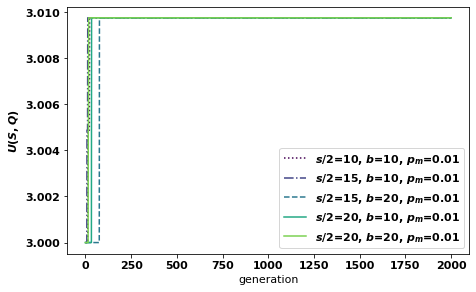

In [309]:
fig, ax = plt.subplots(figsize=(6.5, 4))

i = 0
for index in indices: 
    if scores[index].max() != 3.0:
        plt.plot(scores[index],
                 linestyles[i],
                 label=f'$s/2$={index[0]}, $b$={index[1]}, $p_m$={index[2]}',
                 color=colors[i]
                 );
        i += 1
plt.legend();
plt.tight_layout();

plt.ylabel(r'$U(S, Q)$')
plt.xlabel('generation')

plt.savefig('img/maximum_score_per_generation_tit_for_tat.pdf')

Adaptive. A deterministic strategy that we know has multiple best response sequences.

In [80]:
adaptive = pd.read_csv('/Volumes/ext/Data/raw_data/Adaptive_nan/main.csv')

In [310]:
last_generation_adaptive = adaptive[adaptive['generation'] == 2000]

In [311]:
last_generation_adaptive[last_generation_adaptive['score'] == 4.882926829268293]

,opponent,seed,num. of generations,bottleneck,mutation probability,half size population,generation,index,score,gene_0,...,gene_195,gene_196,gene_197,gene_198,gene_199,gene_200,gene_201,gene_202,gene_203,gene_204
40000,Adaptive,NaN,2000,10,0.01,10,2000,0,4.882927,1,...,0,0,0,0,0,0,0,0,0,0
40001,Adaptive,NaN,2000,10,0.01,10,2000,1,4.882927,1,...,0,0,0,0,0,0,0,0,0,0
40002,Adaptive,NaN,2000,10,0.01,10,2000,2,4.882927,1,...,0,0,0,0,0,0,0,0,0,0
40003,Adaptive,NaN,2000,10,0.01,10,2000,3,4.882927,1,...,0,0,0,0,0,0,0,0,0,0
40004,Adaptive,NaN,2000,10,0.01,10,2000,4,4.882927,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920436,Adaptive,NaN,2000,20,0.01,20,2000,16,4.882927,1,...,0,0,0,0,0,0,0,0,0,0
920437,Adaptive,NaN,2000,20,0.01,20,2000,17,4.882927,1,...,0,0,0,0,0,0,0,0,0,0
920438,Adaptive,NaN,2000,20,0.01,20,2000,18,4.882927,1,...,0,0,0,0,0,0,0,0,0,0
920439,Adaptive,NaN,2000,20,0.01,20,2000,19,4.882927,1,...,0,0,0,0,0,0,0,0,0,0


In [312]:
indices = [(10, 10, 0.01),
           (10, 10, 0.05),
           (20, 20, 0.05),           
           (20, 20, 0.01)]

In [313]:
genes = ["gene_{}".format(i) for i in range(205)]

subset = [f"gene_{i}" for i in [0, 1, 2, 3, 4, 5, 6, 202, 203, 204]]

last_generation_adaptive[last_generation_adaptive['score'] == 4.882926829268293][genes].drop_duplicates()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_195,gene_196,gene_197,gene_198,gene_199,gene_200,gene_201,gene_202,gene_203,gene_204
40000,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
300120,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
480210,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [181]:
with open("tex/best_responses_adaptive_table.tex", "w") as file:
    table = last_generation_adaptive[last_generation_adaptive['score'] == 4.882926829268293][genes].drop_duplicates()[subset].reset_index()

    file.write(table.to_latex().replace('\_', ' ')) 

In [314]:
scores = adaptive.groupby(['half size population', 'bottleneck', 'mutation probability','generation'])['score'].max()

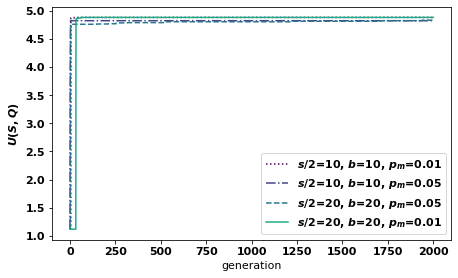

In [315]:
fig, ax = plt.subplots(figsize=(6.5, 4))

for i, index in enumerate(indices): 
    plt.plot(scores[index],
             linestyles[i],
                 label=f'$s/2$={index[0]}, $b$={index[1]}, $p_m$={index[2]}',
             color=colors[i]
                 );
    
plt.legend();

plt.ylabel(r'$U(S, Q)$')
plt.xlabel('generation')

plt.tight_layout();

plt.savefig('img/maximum_score_per_generation_adaptive.pdf')

Champion. A stochastic strategy were the final best response sequence is accurate.

In [137]:
champion = pd.read_csv('/Volumes/ext/Data/raw_data/Champion_9/main.csv')

In [316]:
champion_last_gen = champion[champion['generation'] == 2000]

In [317]:
champion_last_gen[champion_last_gen['score'] == champion_last_gen['score'].max()]

,opponent,seed,num. of generations,bottleneck,mutation probability,half size population,generation,index,score,gene_0,...,gene_195,gene_196,gene_197,gene_198,gene_199,gene_200,gene_201,gene_202,gene_203,gene_204
300120,Champion,9,2000,10,0.01,15,2000,0,3.819512,1,...,0,0,0,0,1,0,0,0,0,0
300121,Champion,9,2000,10,0.01,15,2000,2,3.819512,1,...,0,0,0,0,1,0,0,0,0,0
300122,Champion,9,2000,10,0.01,15,2000,3,3.819512,1,...,0,0,0,0,1,0,0,0,0,0
300123,Champion,9,2000,10,0.01,15,2000,20,3.819512,1,...,0,0,0,0,0,0,0,0,0,0
920420,Champion,9,2000,20,0.01,20,2000,0,3.819512,1,...,0,1,0,0,0,0,0,0,0,0
920421,Champion,9,2000,20,0.01,20,2000,3,3.819512,1,...,0,1,1,0,0,0,0,0,0,0
920422,Champion,9,2000,20,0.01,20,2000,13,3.819512,1,...,0,1,0,0,0,0,0,0,0,0
920423,Champion,9,2000,20,0.01,20,2000,25,3.819512,1,...,0,1,1,0,0,0,0,0,0,0


In [318]:
scores = champion.groupby(['half size population', 'bottleneck', 'mutation probability','generation'])['score'].max()

In [319]:
indices = [(15, 10, 0.01),
           (20, 20, 0.01)]

In [322]:
linestyles = ['-', ':']

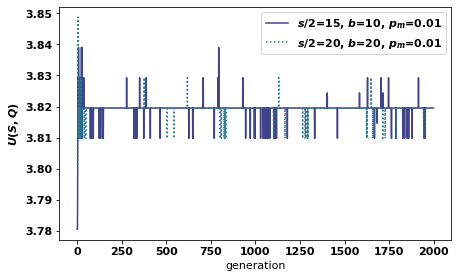

In [326]:
fig, ax = plt.subplots(figsize=(6.5, 4))

for i, index in enumerate(indices): 
    plt.plot(scores[index],
             linestyles[i],
             label=f'$s/2$={index[0]}, $b$={index[1]}, $p_m$={index[2]}',
             color=colors[i + 1]
                 );
    
plt.legend();
plt.ylabel(r'$U(S, Q)$')
plt.xlabel('generation')

plt.tight_layout();

plt.savefig('img/maximum_score_per_generation_champion.pdf')

Random. A stochastic strategies were multiple errors occured during the data collection.

In [218]:
random = pd.read_csv('/Volumes/ext/Data/raw_data/Random_2/main.csv')

In [327]:
random_last_generation = random[random['generation'] == 2000]

In [328]:
random_last_generation.head()

,opponent,seed,num. of generations,bottleneck,mutation probability,half size population,generation,index,score,gene_0,...,gene_195,gene_196,gene_197,gene_198,gene_199,gene_200,gene_201,gene_202,gene_203,gene_204
40000,Random,2,2000,10,0.01,10,2000,13,3.092683,0,...,0,1,0,0,0,0,0,0,0,0
40001,Random,2,2000,10,0.01,10,2000,2,3.063415,0,...,0,1,0,0,0,0,0,0,0,0
40002,Random,2,2000,10,0.01,10,2000,17,2.917073,0,...,0,1,0,0,0,0,0,0,0,0
40003,Random,2,2000,10,0.01,10,2000,4,2.907317,0,...,0,1,0,0,0,0,0,0,0,0
40004,Random,2,2000,10,0.01,10,2000,0,2.902439,0,...,0,1,0,0,0,0,0,0,0,0


In [329]:
indices = [(10, 10, 0.01)]

In [330]:
scores = random.groupby(['half size population', 'bottleneck', 'mutation probability','generation'])['score'].max()

In [331]:
val_bottleneck = 10
val_mutation = 0.01
val_half_size_population = 10

In [332]:
trial = random[(random['bottleneck'] == val_bottleneck) & (random['mutation probability'] == val_mutation) & (random['half size population'] == val_half_size_population)]

In [277]:
actual_scores = []
for g in range(2001):
    score = trial[trial['generation'] == g]['score'].max()
    
    generation_scores = []
    for i, row in trial[(trial['generation'] == g) & (trial['score'] == score)].iterrows():
        axl.seed(2)
        match = axl.Match([axl.Cycler(ss.get_sequence_str(row[genes])), axl.Random()], turns=205)
        _ = match.play()
        
        generation_scores.append(match.final_score_per_turn()[0])
    actual_scores.append(max(generation_scores))

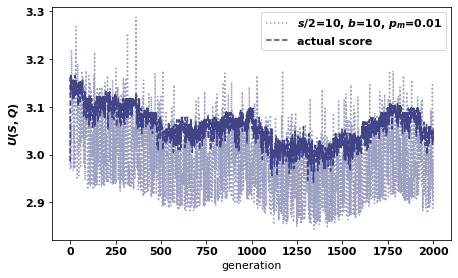

In [352]:
fig, ax = plt.subplots(figsize=(6.5, 4))

for i, index in enumerate(indices[:1]): 
    plt.plot(scores[index],
             ':',
             label=f'$s/2$={index[0]}, $b$={index[1]}, $p_m$={index[2]}',
             color=colors[1],
             alpha=0.5
                 );
    plt.plot(actual_scores, "--",color=colors[1], label='actual score')
plt.legend();

plt.ylabel(r'$U(S, Q)$')
plt.xlabel('generation')


plt.tight_layout();
plt.savefig('img/maximum_score_per_generation_random.pdf')